In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost
import matplotlib

In [2]:

Data=pd.read_csv(r'C:\traffic volume.csv')      

In [3]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,None,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,None,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,None,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,None,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,None,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [4]:
Data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [5]:
Data.shape


(48204, 8)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
holiday           48204 non-null object
temp              48151 non-null float64
rain              48202 non-null float64
snow              48192 non-null float64
weather           48155 non-null object
date              48204 non-null object
Time              48204 non-null object
traffic_volume    48204 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [7]:
#dealing with missing values

Data.isnull().sum()

holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [8]:
Data.dtypes

holiday            object
temp              float64
rain              float64
snow              float64
weather            object
date               object
Time               object
traffic_volume      int64
dtype: object

In [9]:
from collections import Counter

In [10]:
print(Counter(Data['rain']))
print(Counter(Data['snow']))

Counter({0.0: 44735, 0.25: 948, 0.51: 256, 1.02: 123, 0.3: 121, 0.76: 109, 0.38: 99, 1.78: 91, 1.52: 69, 0.64: 55, 1.27: 50, 0.6: 32, 2.79: 29, 0.44: 26, 0.89: 25, 2.54: 23, 0.28: 23, 0.42: 21, 1.4: 21, 0.34: 20, 2.16: 19, 2.29: 19, 2.03: 19, 1.8: 16, 1.09: 16, 3.05: 15, 0.32: 15, 1.2: 15, 0.9: 15, 0.98: 14, 0.68: 13, 0.81: 13, 4.57: 13, 7.11: 12, 0.85: 12, 0.7: 11, 2.1: 11, 0.55: 11, 5.59: 10, 1.86: 10, 8.4: 10, 1.15: 10, 0.47: 9, 5.08: 9, 1.21: 9, 0.43: 9, 6.1: 9, 5.84: 8, 1.66: 8, 0.79: 8, 0.4: 8, 1.14: 8, 2.2: 8, 1.85: 8, 2.41: 8, 3.3: 8, 1.41: 7, 6.6: 7, 0.35: 7, 1.91: 7, 0.52: 7, 1.3: 7, 0.8: 7, 0.66: 7, 2.67: 7, 1.33: 7, 1.1: 7, 4.06: 7, 0.57: 6, 0.29: 6, 0.36: 6, 1.0: 6, 1.44: 6, 8.64: 6, 1.35: 6, 5.97: 6, 0.56: 6, 0.91: 6, 0.54: 6, 0.94: 6, 0.96: 6, 2.86: 6, 0.78: 6, 2.22: 6, 6.35: 6, 4.89: 6, 0.93: 6, 3.13: 6, 0.63: 6, 2.62: 6, 1.6: 6, 4.74: 6, 2.76: 6, 3.45: 6, 0.69: 5, 3.18: 5, 0.61: 5, 5.42: 5, 1.39: 5, 0.53: 5, 0.48: 5, 0.59: 5, 0.71: 5, 0.27: 5, 2.85: 5, 0.65: 5, 1.5: 5,

In [11]:
Data['temp'].fillna(Data['temp'].mean(),inplace=True)
Data['rain'].fillna(Data['rain'].mean(),inplace=True)
Data['snow'].fillna(Data['snow'].mean(),inplace=True)

In [12]:
print(Counter(Data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [13]:
Data['weather'].fillna('Clouds',inplace=True)

In [14]:
Data.isnull().sum()

holiday           0
temp              0
rain              0
snow              0
weather           0
date              0
Time              0
traffic_volume    0
dtype: int64

In [15]:
#Datavisualization


In [16]:
Data.corr()

,temp,rain,snow,traffic_volume
temp,1.000000,0.009070,-0.019758,0.130034
rain,0.009070,1.000000,-0.000090,0.004714
snow,-0.019758,-0.000090,1.000000,0.000735
traffic_volume,0.130034,0.004714,0.000735,1.000000


In [18]:
#sns.heatmap(cor)

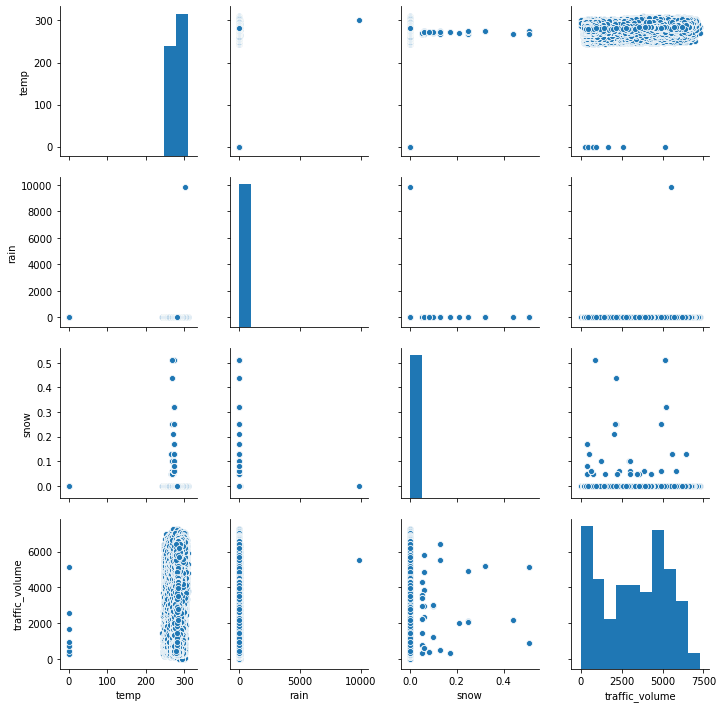

In [19]:
sns.pairplot(Data)

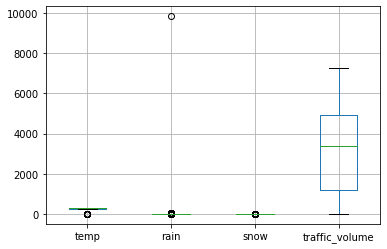

In [20]:
Data.boxplot()

In [21]:
#ENCODING THE DATA

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
Data['weather'] = le.fit_transform(Data['weather'])

In [25]:
Data['holiday'] = le.fit_transform(Data['holiday'])

In [26]:
Data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,7,288.28,0.0,0.0,1,02-10-2012,09:00:00,5545
1,7,289.36,0.0,0.0,1,02-10-2012,10:00:00,4516
2,7,289.58,0.0,0.0,1,02-10-2012,11:00:00,4767
3,7,290.13,0.0,0.0,1,02-10-2012,12:00:00,5026
4,7,291.14,0.0,0.0,1,02-10-2012,13:00:00,4918


In [27]:
# spliiting the date column into year,month,day
Data[["day", "month", "year"]] = Data["date"].str.split("-", expand = True)

In [28]:
Data[["hours","minutes","seconds"]]=Data["Time"].str.split(":",expand=True)

In [29]:
Data.drop(columns=['date','Time'],axis=1,inplace=True)

In [30]:
Data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,7,288.28,0.0,0.0,1,5545,02,10,2012,09,00,00
1,7,289.36,0.0,0.0,1,4516,02,10,2012,10,00,00
2,7,289.58,0.0,0.0,1,4767,02,10,2012,11,00,00
3,7,290.13,0.0,0.0,1,5026,02,10,2012,12,00,00
4,7,291.14,0.0,0.0,1,4918,02,10,2012,13,00,00


In [31]:
#splitting the dataset into dependent and independent variable
y = Data['traffic_volume']
x = Data.drop(columns=['traffic_volume'],axis=1)

In [32]:
names = x.columns

In [33]:
from sklearn.preprocessing import scale

In [34]:
x = scale(x)

In [35]:
x  = pd.DataFrame(x,columns=names)

In [36]:
x.head()

,holiday,temp,rain,snow,weather,day,month,year,hours,minutes,seconds
0,0.015856,0.530485,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0
1,0.015856,0.611467,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0
2,0.015856,0.627964,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0
3,0.015856,0.669205,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0
4,0.015856,0.744939,-0.007463,-0.027235,-0.566452,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0


In [37]:
 #splitting the data into train and set
    
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
#MODEL BUILDING

In [40]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [41]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [42]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

C:\Users\sandra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sandra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [44]:
#model evaluation
from sklearn import metrics

In [45]:
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

-5.517285423636865
1.0
0.9647359182799591
-13.889978476182586
0.8349874938269883


In [46]:
#with testing data finding the rscore
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5=XGB.predict(x_test)

In [47]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))

-5.399396398322181
0.6919861295093884
0.7898695726042346
-13.647563377383657
0.7922184852381723


In [48]:
MSE = metrics.mean_squared_error(p3,y_test)

In [49]:
np.sqrt(MSE)

832.2863460176741

In [50]:
import pickle

In [51]:
pickle.dump(Rand,open("model.pkl",'wb'))
pickle.dump(le,open("encoder.pkl",'wb'))

In [52]:

Data1 = pd.read_csv(r"C:\traffic volume.csv")

In [1]:
print(Data1['holiday'].unique())
print(Data['holiday'].unique())

NameError: name 'Data1' is not defined

In [54]:
#random forest giving more accuracy


In [55]:
#pred = Rand.predict(x_test)

In [56]:
#metrics.r2_score(pred,y_test)